In [98]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [43]:
normal = cv2.imread('train/NORMAL/IM-0115-0001.jpeg')

In [44]:
normal.shape

(1858, 2090, 3)

In [45]:
normal =cv2.cvtColor(normal,cv2.COLOR_BGR2RGB)

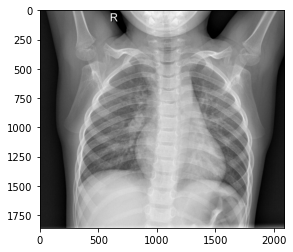

In [46]:
plt.imshow(normal)

In [47]:
PNEUMONIA = cv2.imread('train/PNEUMONIA/person1_bacteria_1.jpeg')

In [48]:
PNEUMONIA.shape

(439, 712, 3)

In [49]:
PNEUMONIA =cv2.cvtColor(PNEUMONIA,cv2.COLOR_BGR2RGB)

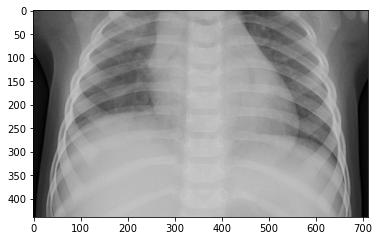

In [50]:
plt.imshow(PNEUMONIA)

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
img_gen = ImageDataGenerator(rotation_range=30,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            rescale=1/255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [53]:
img_gen.random_transform(normal)

array([[[ 26,  26,  26],
        [ 27,  27,  27],
        [ 27,  27,  27],
        ...,
        [ 12,  12,  12],
        [ 11,  11,  11],
        [ 11,  11,  11]],

       [[ 26,  26,  26],
        [ 26,  26,  26],
        [ 26,  26,  26],
        ...,
        [ 12,  12,  12],
        [ 11,  11,  11],
        [ 10,  10,  10]],

       [[ 27,  27,  27],
        [ 26,  26,  26],
        [ 26,  26,  26],
        ...,
        [ 11,  11,  11],
        [ 11,  11,  11],
        [ 10,  10,  10]],

       ...,

       [[230, 230, 230],
        [229, 229, 229],
        [226, 226, 226],
        ...,
        [ 22,  22,  22],
        [ 23,  23,  23],
        [ 24,  24,  24]],

       [[229, 229, 229],
        [227, 227, 227],
        [229, 229, 229],
        ...,
        [ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22]],

       [[228, 228, 228],
        [226, 226, 226],
        [233, 233, 233],
        ...,
        [ 22,  22,  22],
        [ 23,  23,  23],
        [ 23,  23,  23]]

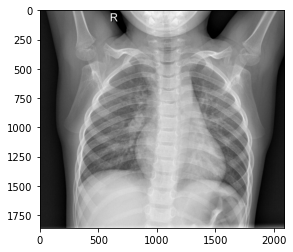

In [54]:
plt.imshow(normal)

In [65]:
img_gen.flow_from_directory('train')

Found 5216 images belonging to 2 classes.


In [66]:
img_gen.flow_from_directory('test')

Found 624 images belonging to 2 classes.


In [67]:
imshape=(150,150,3)

In [70]:
from tensorflow.keras.models import Sequential

In [71]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout

In [72]:
model = Sequential()

In [74]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=imshape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=imshape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=imshape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [76]:
 model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [78]:
batch_size =16
train_gen = img_gen.flow_from_directory('train',
                                        batch_size = batch_size,
                                       target_size = imshape[:2],
                                       class_mode='binary')

Found 5216 images belonging to 2 classes.


In [82]:
test_gen = img_gen.flow_from_directory('test',
                                        batch_size = batch_size,
                                       target_size = imshape[:2],
                                       class_mode='binary')

Found 624 images belonging to 2 classes.


In [80]:
train_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [104]:
results = model.fit_generator(train_gen,epochs=50,steps_per_epoch=100,validation_data=test_gen,validation_steps=12)

Epoch 1/50
100/100 [==============================] - 96s 956ms/step - loss: 0.2435 - accuracy: 0.9013 - val_loss: 0.4850 - val_accuracy: 0.7917
Epoch 2/50
100/100 [==============================] - 83s 833ms/step - loss: 0.2409 - accuracy: 0.8931 - val_loss: 0.6782 - val_accuracy: 0.7240
Epoch 3/50
100/100 [==============================] - 80s 804ms/step - loss: 0.2236 - accuracy: 0.9169 - val_loss: 0.6830 - val_accuracy: 0.7292
Epoch 4/50
100/100 [==============================] - 81s 809ms/step - loss: 0.2310 - accuracy: 0.9094 - val_loss: 0.3168 - val_accuracy: 0.8594
Epoch 5/50
100/100 [==============================] - 80s 799ms/step - loss: 0.2514 - accuracy: 0.9000 - val_loss: 0.8416 - val_accuracy: 0.7135
Epoch 6/50
100/100 [==============================] - 81s 814ms/step - loss: 0.2431 - accuracy: 0.8963 - val_loss: 0.4337 - val_accuracy: 0.8438
Epoch 7/50
100/100 [==============================] - 80s 799ms/step - loss: 0.2368 - accuracy: 0.9006 - val_loss: 0.6806 - val_ac

In [105]:
print(results.history['accuracy'])

[0.9012500047683716, 0.8931249976158142, 0.9168750047683716, 0.909375011920929, 0.8999999761581421, 0.8962500095367432, 0.9006249904632568, 0.9200000166893005, 0.9206249713897705, 0.9112499952316284, 0.9193750023841858, 0.9125000238418579, 0.9181249737739563, 0.925000011920929, 0.921875, 0.9162499904632568, 0.9206249713897705, 0.9143750071525574, 0.9225000143051147, 0.9193750023841858, 0.9337499737739563, 0.9318749904632568, 0.934374988079071, 0.9368749856948853, 0.9312499761581421, 0.9237499833106995, 0.9312499761581421, 0.9381250143051147, 0.9293749928474426, 0.9375, 0.9325000047683716, 0.9418749809265137, 0.9481250047683716, 0.9493749737739563, 0.9337499737739563, 0.940625011920929, 0.9487500190734863, 0.9474999904632568, 0.9262499809265137, 0.9443749785423279, 0.9424999952316284, 0.9412500262260437, 0.9524999856948853, 0.9375, 0.9312499761581421, 0.9325000047683716, 0.9375, 0.9393749833106995, 0.9431250095367432, 0.940625011920929]


In [106]:
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<ipython-input-107-c6aa031b397f>:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('accuracy','loss',loc='upper left')
<ipython-input-107-c6aa031b397f>:6: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('accuracy','loss',loc='upper left')
<ipython-input-107-c6aa031b397f>:6: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('accuracy','loss',loc='upper left')


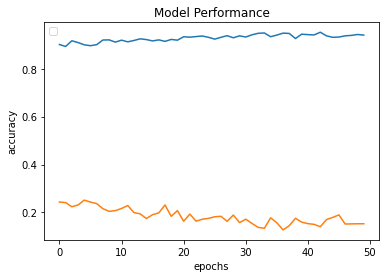

In [107]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['loss'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend('accuracy','loss',loc='upper left')
plt.show()

<ipython-input-108-1600ffceb85b>:6: UserWarning: The handle 'u' has a label of '_' which cannot be automatically added to the legend.
  plt.legend('accuracy','val_accuracy',loc='upper left')
<ipython-input-108-1600ffceb85b>:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('accuracy','val_accuracy',loc='upper left')
<ipython-input-108-1600ffceb85b>:6: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('accuracy','val_accuracy',loc='upper left')
<ipython-input-108-1600ffceb85b>:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-spec

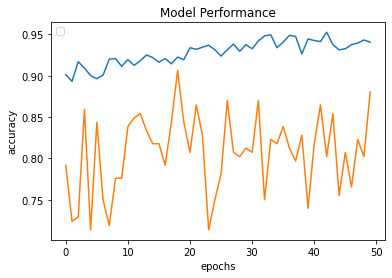

In [108]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend('accuracy','val_accuracy',loc='upper left')
plt.show()

In [109]:
from tensorflow.keras.preprocessing import image

In [110]:
pneumonia_img = image.load_img('test/PNEUMONIA/person30_virus_69.jpeg',target_size=(imshape[:2]))

pneumonia_img = image.img_to_array(pneumonia_img)
print(pneumonia_img.shape)
pneumonia_img = np.expand_dims(pneumonia_img,axis=0)
print(pneumonia_img.shape)
pneumonia_img = pneumonia_img/255

(150, 150, 3)
(1, 150, 150, 3)


In [111]:
prediction = model.predict(pneumonia_img)

In [112]:
print(f'Probabilty of Image to be an affected img: {prediction}')

Probabilty of Image to be an affected img: [[0.7525611]]


In [113]:
results = model.predict_classes(pneumonia_img)
print(results)

[[1]]


In [114]:
model.save('chest_xray_classifier.h5')